LEGO Bricks Classification 
======================

Philipp Bock  
Technical University of Munich  
Garching, 31st of Juli, 2019  


1. Library Structure
-------------------------------------


2. Project: Lego Brick Classification
-------------------------------------


Library Structure
=============
![title](jupyterResources\img\components_1.png)


![title](jupyterResources\img\neuralNetwork_desc.png)

![title](jupyterResources\img\utilities_desc.png)

Lego Bricks Classification
===========================


<img src="jupyterResources\img\bugattiLego.jpg" alt="Drawing" />

(Source: Lego Group, https://www.lego.com/de-de/themes/technic/bugatti-chiron/build-for-real)

<img src="jupyterResources\img\legomess.jpg" alt="Drawing" width="80%"/>
(Source: Flickr, https://www.flickr.com/photos/strutta/2326837169/ )



Dataset:
=====
    - 16 different types of Lego Bricks
    - 400 images with different view angles/ type
    - In total 6400 images
    - Source https://www.kaggle.com/joosthazelzet/lego-brick-images





2357 - Brick corner 1x2x2
-------------------------------------
<img src="jupyterResources\img\brick1.png" alt="Drawing" style="height: 100px;"/>

3022 - Plate 2x2
----------------------------------
<img src="jupyterResources\img\brick5.png" alt="Drawing" style="height: 100px;"/>
<!---
3040 - Roof Tile 1x2x45deg
--------------------------------------
<img src="jupyterResources\img\brick8.png" alt="Drawing" style="height: 100px;"/>--->

3794 - Plate 1x2 with 1 Knob
----------------------------------------
<img src="jupyterResources\img\brick13.png" alt="Drawing" style="height: 100px;"/>



Import stuff

In [2]:
import sys
#projectDir should point to the Project path
projectDir='/mnt/c/Users/phili/Desktop/Projekte/libdl/'
# projectDir='/home/pbo/CLionProjects/libdl/'
#select if release or build
sys.path.append(projectDir+'cmake-build-release/library/bindings')
sys.path.append(projectDir+'cmake-build-release/library/bindings')

import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import libdl as dl 

#name of the pretrainedNetwork
pretrainedNetwork = "batch16_500Samples"


Creation of DataSet object

In [3]:
batchSize=16
amountBatches = 100
dataStringPairs = dl.LegoDataLoader.shuffleData(projectDir+"data/") 
#create Dataset für Training and Validation
data = dl.DataSet()
dl.LegoDataLoader.getData(batchSize*amountBatches,dataStringPairs,data)

Creation of a Graph object that will be passed to the layers

In [4]:
graph = dl.Graph()


Layer Creation, for the Lego Brick Classification we use:
    - Input Layer where each Sample is of Dimension 200x200 and has 4 channels
    - Convolutional Layer, 32=Filters, Kerneldim=8, Stride= 2, Activation = ReLu
    - MaxPool Layer, KernelDim=2, Stride = 2
    - Convolutional Layer, 64=Filters, Kerneldim=5, Stride= 2, Activation = ReLu
    - MaxPool Layer, KernelDim=2, Stride = 2
    - Dense Layer, 1024 Neurons, Activation = ReLu
    - Dense Layer, 16 Neurons, Activation = ReLu
    - Logits Layer with Softmax Classification
    - Loss Layer, LossType = CrossEntropy
    
     

In [5]:
inputLayer = dl.InputLayer(graph,batchSize,160000,4)

convolution1 = dl.ConvolutionLayer(inputLayer,graph, dl.ActivationType.ReLu,32,8,2,dl.InitializationType.Xavier)
maxPool1 = dl.MaxPoolLayer(convolution1,graph,2,2)


convolution2 = dl.ConvolutionLayer(maxPool1,graph, dl.ActivationType.ReLu,64,5,2,dl.InitializationType.Xavier)

maxPool2 = dl.MaxPoolLayer(convolution2,graph,2,2)


dense1 = dl.DenseLayer(maxPool2,graph,dl.ActivationType.ReLu,1024,dl.InitializationType.Xavier)

dense2 = dl.DenseLayer(dense1,graph,dl.ActivationType.ReLu,16,dl.InitializationType.Xavier)

logits = dl.LogitsLayer(dense2,graph,16)

loss = dl.LossLayer(logits,graph, dl.LossType.CrossEntropy)

Network creation and loading of pretrained Network

hyper parameters used:

    - batchSize =16
    - epochs =5
    - learningRate=0.0001
    - amountBatches=300
    - Adam Optimizer with 
        - beta1 = 0.9 
        - beta2 =0.999


![title](jupyterResources\img\accuracy_Graph_batch16_500Samples.png)



![title](jupyterResources\img\loss_Graph_batch16_500Samples.png)


In [6]:
network = dl.NeuralNetwork(graph,inputLayer,loss)
network.readParameters(projectDir+"WeightDeposit/",pretrainedNetwork)

# this is for actual training

#set hyper parameters
# epochs =5
# learningRate=0.0001
# amountBatches=300

# hyperParameters = dl.HyperParameters(epochs,batchSize,learningRate)
#trainingEvaluation = network.trainAndValidate(data,learningParameters,1)
#network.writeVariables(projectDir+"WeightDeposit/",nameNewNetwork)

True

In [1]:
referenceList =[[0, '2357 - Brick corner 1x2x2','lego/train/1/0002.png'],
 [1, '3003 - Brick 2x2','lego/train/2/0001.png'],
 [2, '3004 - Brick 1x2','lego/train/3/0001.png'],
 [3, '3005 - Brick 1x2','lego/train/4/0001.png'],
 [4, '3022 - Plate 2x2','lego/train/5/0009.png'],
 [5, '3023 - Plate 1x2','lego/train/6/0001.png'],
 [6, '3024 - Plate 1x1','lego/train/7/0001.png'],
 [7, '3040 - Roof Tile 1x2x45deg','lego/train/8/0001.png'],
 [8, '3069 - Flat Tile 1x2','lego/train/9/0028.png'],
 [9, '3673 - Peg 2M','lego/train/10/0001.png'],
 [10, '3713 - Bush for Cross Axle','lego/train/11/0001.png'],
 [11, '3794 - Plate 1x2 with 1 Knob','lego/train/12/0001.png'],
 [12, '6632 - Technic Lever 3M','lego/train/13/0014.png'],
 [13, '11214 - Bush 3M friction with Cross axis','lego/train/14/0001.png'],
 [14, '18651 - Cross Axle 2M with Snap friction','lego/train/15/0001.png'],
 [15, '32123 - half Bush','lego/train/16/0001.png']]

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

def showPredictions(sampleBatch,labelBatch,network,i,dataStringPairs):
   
    prediction = network.predictBatch(sampleBatch,labelBatch)
    for (n,singlePrediction,label) in zip(enumerate(prediction),prediction,labelBatches[i]):
        maxP = max(singlePrediction)
        pred = np.where(singlePrediction==maxP)[0][0].astype(int)
        actual=dataStringPairs[i*batchSize+n[0]][1]
        img1=mpimg.imread(dataStringPairs[i*batchSize+n[0]][0])        
        
        img2=mpimg.imread(projectDir+'data/'+referenceList[pred][2])
#         print("Actual:"+referenceList[dataStringPairs[i*batchSize+n[0]][1]][1])
#         print('Predicted: '+referenceList[pred][1])
#         print('Probability: '+maxP.astype(str))
        f, axarr = plt.subplots(1,2)
        axarr[0].imshow(img1)
        axarr[1].imshow(img2)
        axarr[0].title.set_text("Actual:"+referenceList[dataStringPairs[i*batchSize+n[0]][1]][1])
        axarr[1].title.set_text('Predicted: '+referenceList[pred][1]+'\n'+'Probability: '+maxP.astype(str))

        if pred!=actual:
            print(bcolors.FAIL+'WRONG PREDICTION')
        else:
            print(bcolors.OKGREEN+'CORRECT PREDICTION')
        plt.subplots_adjust(left=0.125, bottom=0.1, right=1.5, top=0.9, wspace=0.2, hspace=None)

        
        plt.show()

CORRECT PREDICTION


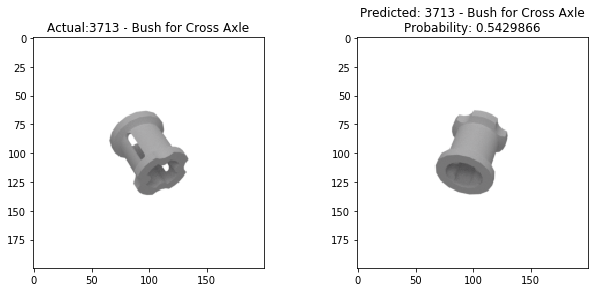

WRONG PREDICTION


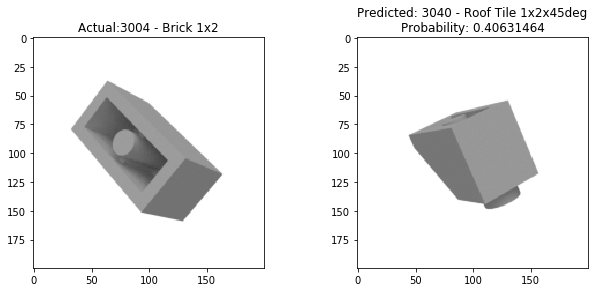

CORRECT PREDICTION


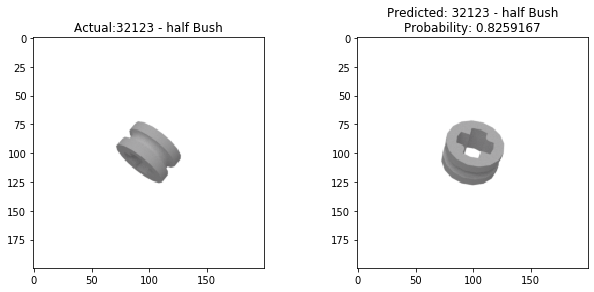

CORRECT PREDICTION


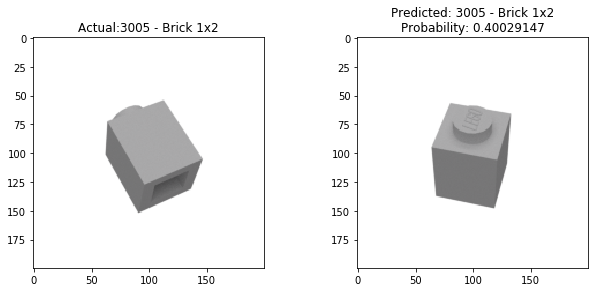

WRONG PREDICTION


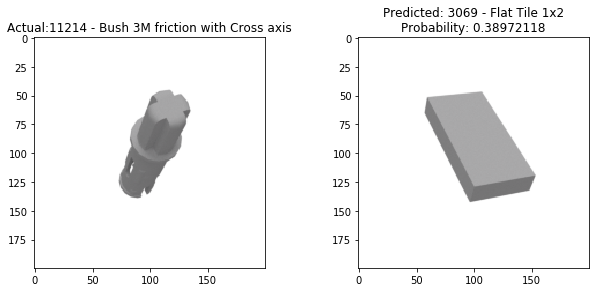

WRONG PREDICTION


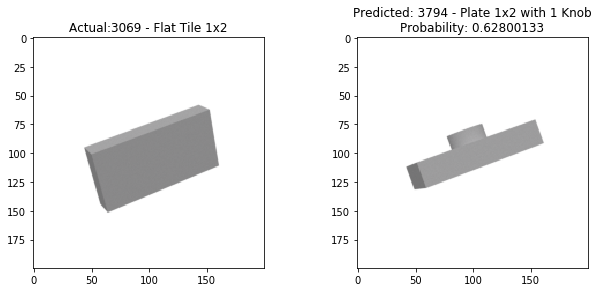

WRONG PREDICTION


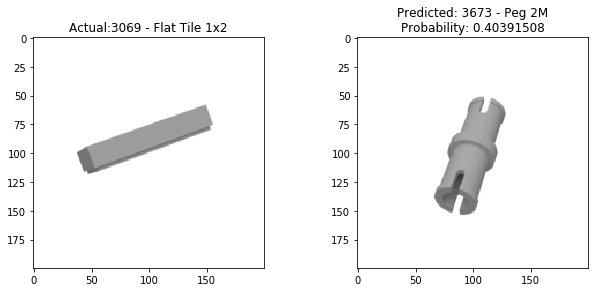

WRONG PREDICTION


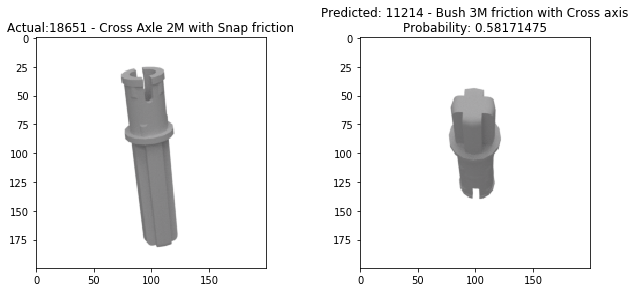

WRONG PREDICTION


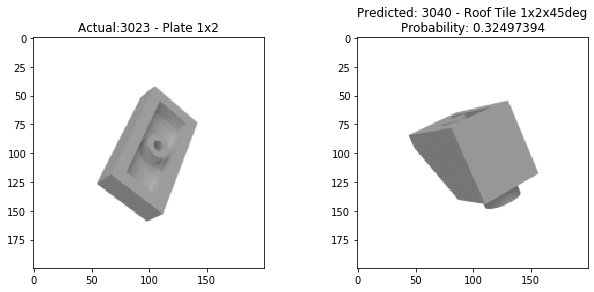

WRONG PREDICTION


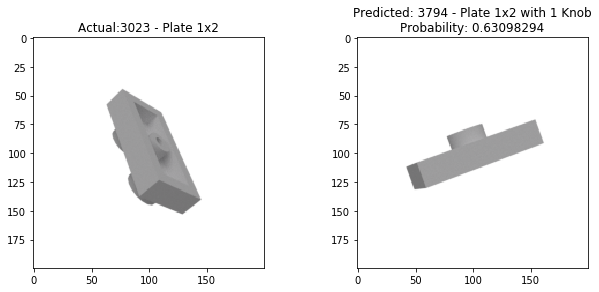

WRONG PREDICTION


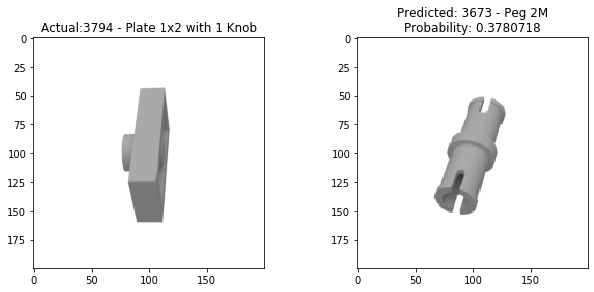

CORRECT PREDICTION


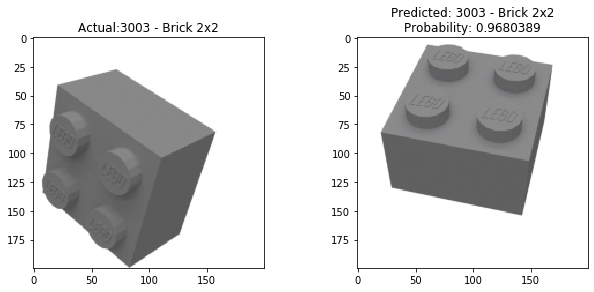

CORRECT PREDICTION


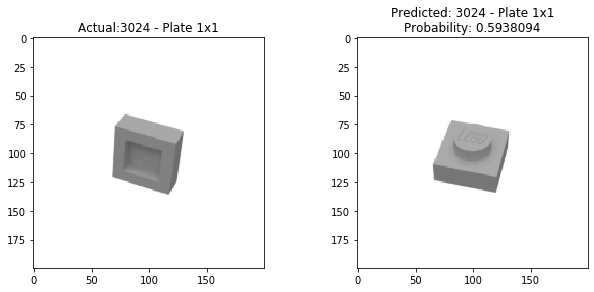

CORRECT PREDICTION


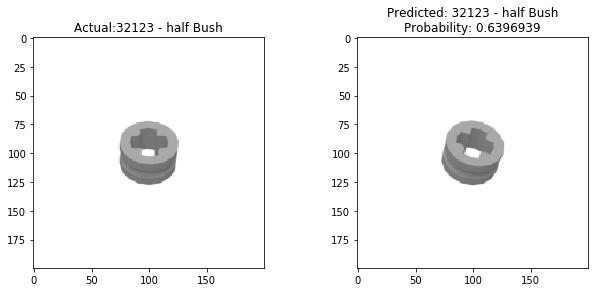

CORRECT PREDICTION


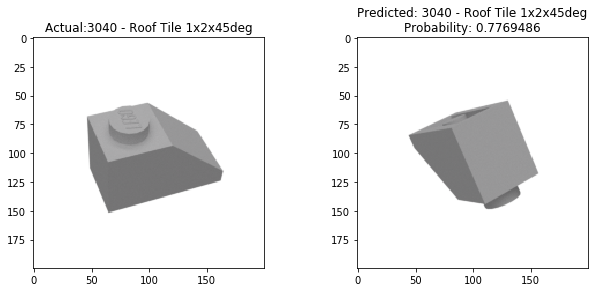

WRONG PREDICTION


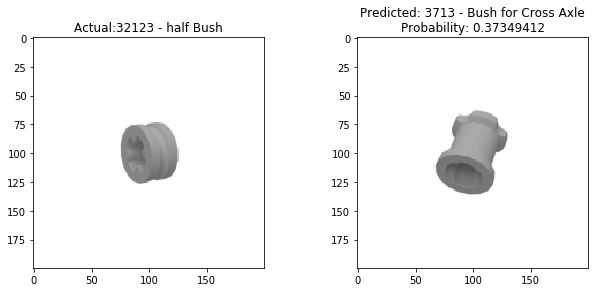

In [7]:
sampleBatches =dl.NeuralNetwork.extractBatchList(data._trainingSamples,batchSize)
labelBatches =dl.NeuralNetwork.extractBatchList(data._trainingLabels,batchSize)


#i sets the #Batch that should be predicted
i=2 
        
showPredictions(sampleBatches[i],labelBatches[i],network,i,dataStringPairs)

THANK YOU FOR YOUR ATTENTION!
===============================

Accuracy Graph with BatchSize 4
![title](jupyterResources\img\accuracy_Graph_batch4_500Samples.png)


Loss Graph with BatchSize 4
![title](jupyterResources\img\loss_Graph_batch4_500Samples.png)


Computational Graph
==================
![title](jupyterResources\img\UML_compute_graph.png)


![title](jupyterResources\img\computeForward.png)


![title](jupyterResources\img\computeBackwards.png)


![title](jupyterResources\img\updateParams.png)



Each Operation has to implement forwardPass() and BackwardPass()
    - forwardPass assumes that the input node has already provided  an outputValue
    - backwardPass assumes that the previous node has set its gradients  as _previousGradients in the current Node

Each Parameter has to implement updateParameter()
    - updateParameter() assumes that _previousGradients is set in current Node
